## Introduction

In [33]:
%pylab inline
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
from plotly import tools
import scipy
import scipy.stats as scs
import plotly.plotly as py
from scipy import stats
from plotly.graph_objs import *
import plotly.plotly as py
from plotly.graph_objs import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


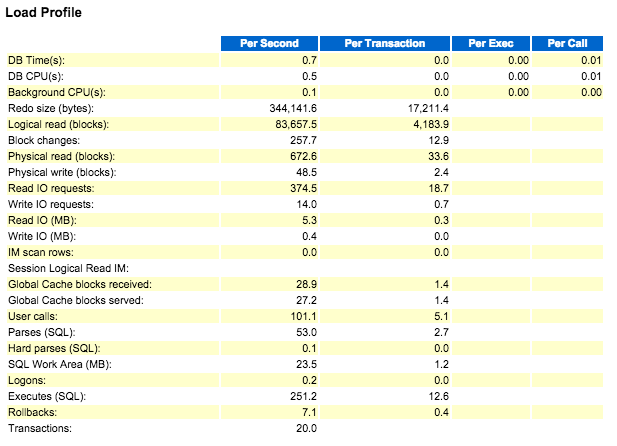

In [3]:
Image(filename='images/load_profile.png')

In [15]:
df=pd.read_csv('data/TMP_AWR_LOAD_PROFILE_AGG.csv', sep='|',parse_dates=True)
df.head()

,site_id,config_id,run_id,stat_id,stat_name,stat_per_sec,stat_per_txn,stat_per_exec,stat_per_call,start_time
0,37,1,1,265418,Global Cache blocks received,4467.21,16.36,NaN,NaN,03-OCT-14 08.00.00.000000 AM
1,37,1,1,265427,Transactions,274.49,NaN,NaN,NaN,03-OCT-14 08.00.00.000000 AM
2,37,1,1,265410,Logical read (blocks),291880.19,1064.87,NaN,NaN,03-OCT-14 08.00.00.000000 AM
3,37,1,1,265419,Global Cache blocks served,4467.02,16.34,NaN,NaN,03-OCT-14 08.00.00.000000 AM
4,37,1,1,265421,Parses (SQL),1131.04,4.14,NaN,NaN,03-OCT-14 08.00.00.000000 AM


In [16]:
df=df.pivot_table(index='start_time', columns='stat_name', values='stat_per_sec')
df.head()

stat_name,Background CPU(s),Block changes,DB CPU(s),DB Time(s),Executes (SQL),Global Cache blocks received,Global Cache blocks served,Hard parses (SQL),IM scan rows,Logical read (blocks),Logons,Parses (SQL),Physical read (blocks),Physical write (blocks),Read IO (MB),Read IO requests,Redo size (bytes),Rollbacks,SQL Work Area (MB),Session Logical Read IM,Transactions,User calls,Write IO (MB),Write IO requests
start_time,,,,,,,,,,,,,,,,,,,,,,,,
01-APR-15 08.00.00.000000 AM,2.34,7171.66,8.34,21.33,7295.85,4067.55,4067.66,0.53,0,368308.41,9.11,1474.92,18687.53,945.27,146.02,12323.87,2520626.66,204.03,471.86,NaN,342.13,3172.36,7.38,791.23
01-APR-15 10.00.00.000000 PM,1.88,5829.02,5.75,14.98,4943.24,3371.89,3374.17,0.41,0,274450.76,0.55,1036.19,30446.88,714.73,237.88,9459.97,1708287.87,143.23,282.08,NaN,243.01,2288.04,5.59,603.88
01-JAN-15 08.00.00.000000 AM,NaN,1746.34,1.80,4.07,2277.13,1618.04,1617.80,0.30,NaN,119422.36,0.23,244.73,20549.94,205.81,160.56,3976.52,577855.43,74.32,113.44,NaN,139.59,970.47,1.61,162.10
01-JUL-15 08.00.00.000000 AM,2.07,6530.64,6.92,18.46,6485.98,4164.01,4164.06,1.67,0,306467.96,6.56,924.75,19949.88,864.99,155.87,9908.58,2263412.36,198.20,424.66,NaN,334.05,3064.53,6.76,721.93
01-JUL-15 10.00.00.000000 PM,1.80,5853.14,5.19,14.20,4787.97,3469.74,3469.68,0.94,0,248284.74,0.53,679.44,24650.75,728.26,192.59,8087.20,1731536.10,151.27,288.96,NaN,259.02,2370.28,5.70,606.48


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 01-APR-15 08.00.00.000000 AM to 31-OCT-14 08.00.00.000000 AM
Data columns (total 24 columns):
Background CPU(s)               393 non-null float64
Block changes                   463 non-null float64
DB CPU(s)                       463 non-null float64
DB Time(s)                      463 non-null float64
Executes (SQL)                  463 non-null float64
Global Cache blocks received    463 non-null float64
Global Cache blocks served      463 non-null float64
Hard parses (SQL)               463 non-null float64
IM scan rows                    393 non-null float64
Logical read (blocks)           463 non-null float64
Logons                          463 non-null float64
Parses (SQL)                    463 non-null float64
Physical read (blocks)          463 non-null float64
Physical write (blocks)         463 non-null float64
Read IO (MB)                    463 non-null float64
Read IO requests                463 non-null float64


Replacing all the null values by its mean

In [18]:
columns=df.columns
for column in columns:
    mean_column=np.mean(df[column])
    df[column]=df[column].fillna(mean_column)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 01-APR-15 08.00.00.000000 AM to 31-OCT-14 08.00.00.000000 AM
Data columns (total 24 columns):
Background CPU(s)               463 non-null float64
Block changes                   463 non-null float64
DB CPU(s)                       463 non-null float64
DB Time(s)                      463 non-null float64
Executes (SQL)                  463 non-null float64
Global Cache blocks received    463 non-null float64
Global Cache blocks served      463 non-null float64
Hard parses (SQL)               463 non-null float64
IM scan rows                    463 non-null float64
Logical read (blocks)           463 non-null float64
Logons                          463 non-null float64
Parses (SQL)                    463 non-null float64
Physical read (blocks)          463 non-null float64
Physical write (blocks)         463 non-null float64
Read IO (MB)                    463 non-null float64
Read IO requests                463 non-null float64


In [20]:
pd.set_option('display.max_columns', None)
df.head()

stat_name,Background CPU(s),Block changes,DB CPU(s),DB Time(s),Executes (SQL),Global Cache blocks received,Global Cache blocks served,Hard parses (SQL),IM scan rows,Logical read (blocks),Logons,Parses (SQL),Physical read (blocks),Physical write (blocks),Read IO (MB),Read IO requests,Redo size (bytes),Rollbacks,SQL Work Area (MB),Session Logical Read IM,Transactions,User calls,Write IO (MB),Write IO requests
start_time,,,,,,,,,,,,,,,,,,,,,,,,
01-APR-15 08.00.00.000000 AM,2.340000,7171.66,8.34,21.33,7295.85,4067.55,4067.66,0.53,0,368308.41,9.11,1474.92,18687.53,945.27,146.02,12323.87,2520626.66,204.03,471.86,NaN,342.13,3172.36,7.38,791.23
01-APR-15 10.00.00.000000 PM,1.880000,5829.02,5.75,14.98,4943.24,3371.89,3374.17,0.41,0,274450.76,0.55,1036.19,30446.88,714.73,237.88,9459.97,1708287.87,143.23,282.08,NaN,243.01,2288.04,5.59,603.88
01-JAN-15 08.00.00.000000 AM,2.157354,1746.34,1.80,4.07,2277.13,1618.04,1617.80,0.30,0,119422.36,0.23,244.73,20549.94,205.81,160.56,3976.52,577855.43,74.32,113.44,NaN,139.59,970.47,1.61,162.10
01-JUL-15 08.00.00.000000 AM,2.070000,6530.64,6.92,18.46,6485.98,4164.01,4164.06,1.67,0,306467.96,6.56,924.75,19949.88,864.99,155.87,9908.58,2263412.36,198.20,424.66,NaN,334.05,3064.53,6.76,721.93
01-JUL-15 10.00.00.000000 PM,1.800000,5853.14,5.19,14.20,4787.97,3469.74,3469.68,0.94,0,248284.74,0.53,679.44,24650.75,728.26,192.59,8087.20,1731536.10,151.27,288.96,NaN,259.02,2370.28,5.70,606.48


In [21]:
del df['Session Logical Read IM']

In [22]:
df.head()

stat_name,Background CPU(s),Block changes,DB CPU(s),DB Time(s),Executes (SQL),Global Cache blocks received,Global Cache blocks served,Hard parses (SQL),IM scan rows,Logical read (blocks),Logons,Parses (SQL),Physical read (blocks),Physical write (blocks),Read IO (MB),Read IO requests,Redo size (bytes),Rollbacks,SQL Work Area (MB),Transactions,User calls,Write IO (MB),Write IO requests
start_time,,,,,,,,,,,,,,,,,,,,,,,
01-APR-15 08.00.00.000000 AM,2.340000,7171.66,8.34,21.33,7295.85,4067.55,4067.66,0.53,0,368308.41,9.11,1474.92,18687.53,945.27,146.02,12323.87,2520626.66,204.03,471.86,342.13,3172.36,7.38,791.23
01-APR-15 10.00.00.000000 PM,1.880000,5829.02,5.75,14.98,4943.24,3371.89,3374.17,0.41,0,274450.76,0.55,1036.19,30446.88,714.73,237.88,9459.97,1708287.87,143.23,282.08,243.01,2288.04,5.59,603.88
01-JAN-15 08.00.00.000000 AM,2.157354,1746.34,1.80,4.07,2277.13,1618.04,1617.80,0.30,0,119422.36,0.23,244.73,20549.94,205.81,160.56,3976.52,577855.43,74.32,113.44,139.59,970.47,1.61,162.10
01-JUL-15 08.00.00.000000 AM,2.070000,6530.64,6.92,18.46,6485.98,4164.01,4164.06,1.67,0,306467.96,6.56,924.75,19949.88,864.99,155.87,9908.58,2263412.36,198.20,424.66,334.05,3064.53,6.76,721.93
01-JUL-15 10.00.00.000000 PM,1.800000,5853.14,5.19,14.20,4787.97,3469.74,3469.68,0.94,0,248284.74,0.53,679.44,24650.75,728.26,192.59,8087.20,1731536.10,151.27,288.96,259.02,2370.28,5.70,606.48


In [71]:
dist_names = ['gamma', 'lognorm', 'alpha' ,'anglit','arcsine','bradford','burr', 'cauchy']

In [68]:
for col in df.columns:
    dist_string='gamma'
    dist = getattr(scipy.stats, dist_string)
    y=df['col'].values
    size = y.__len__()
    x = scipy.arange(size)
    h = plt.hist(y, bins=limit, color='w')
    

KeyError: 'col'

In [72]:
import scipy
results = {}
params={}
for dist in dist_names:
    limit = 30
    distribution = getattr(scipy.stats, dist)
    y=df['Background CPU(s)'].values
    #size = y.__len__()
    x = scipy.arange(size)
    #plt.hist(y, bins=limit, color='w')
    param = distribution.fit(y)
    goodness_of_fit = kstest(y, dist_name, param)
    params[dist]=param
    results[dist] = goodness_of_fit

TypeError: _parse_args() takes from 2 to 4 positional arguments but 5 were given

In [70]:
print(params)
print(results)

{'arcsine': (0.84953324680580988, 2.5304667531941907), 'gamma': (10861.304542462454, -43.879827740201861, 0.0042386392823745064), 'anglit': (2.1196055542560814, 1.6279461369037564), 'lognorm': (0.011219622079287554, -37.191220351916201, 39.346557441345766), 'alpha': (25.914875234625526, -9.3934739916865837, 298.88094788063131)}
{'arcsine': KstestResult(statistic=0.80993520518358531, pvalue=0.0), 'gamma': KstestResult(statistic=0.10969862402291153, pvalue=2.6242229842710074e-05), 'anglit': KstestResult(statistic=0.64002371680207104, pvalue=0.0), 'lognorm': KstestResult(statistic=0.9973679318068166, pvalue=0.0), 'alpha': KstestResult(statistic=1.0, pvalue=0.0)}


In [65]:
param

(2.1373717868375781, 0.20373042464035115)